<a href="https://colab.research.google.com/github/satyhim/Projects/blob/main/NLP_Sentiment_Analysis_Tweeter_Data3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis : Tweeter Data

#Problem Statement:

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiments associalted with it. so the task is to classify racist or sexist tweets from the other tweets.


Formally, given a training sample of tweets and label, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the given test dataset.

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import warnings
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_train=pd.read_csv('/content/drive/MyDrive/Python/Project/Sentiment_analysis/Train_tweets.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Python/Project/Sentiment_analysis/Test_tweets.csv')


In [3]:
df_train.shape

(31962, 3)

In [4]:
df_train.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [5]:
df_test.shape

(17197, 2)

In [6]:
df_test.columns

Index(['id', 'tweet'], dtype='object')

In [7]:
df_train.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
df_test.isna().sum()

id       0
tweet    0
dtype: int64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [10]:
df_train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [11]:
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [12]:
df_train['label'].unique()

array([0, 1])

Now we will check out some non racist/sexist tweets : 

In [13]:
df_train[df_train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


Now we will check out some racist/sexist tweets :

In [14]:
df_train[df_train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


Now we can see there are many words and characters which are not required in the tweets for our analysis.

Lets check label distribution in the dataset:

In [15]:
df_train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

So we can see there are 29720 tweets are non racist/sexist and only 2242 tweets are racist/sexist tweets.

Checking length disrtibution of words in the tweets in both train and test data:

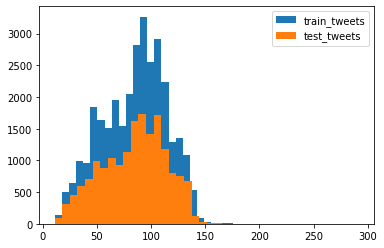

In [16]:
length_train=df_train['tweet'].str.len()
length_test=df_test['tweet'].str.len()
plt.hist(length_train, bins=40, label="train_tweets")
plt.hist(length_test, bins=40, label="test_tweets")
plt.legend()
plt.show()

#Data Cleaning

Before we begin cleaning, let's first combine train and test datasets. Combining the datasets will make it convenient for us to preprocess the data. Later we will split it back into train and test data.

In [17]:
df = df_train.append(df_test, ignore_index=True, sort=False)
df.shape

(49159, 3)

Given below is a user-defined function to remove unwanted text patterns from tweets.

In [18]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

**1. Removing Twitter Handles (@user)**

In [19]:
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


**2. Removing Punctuations, Numbers, and Special Characters**

Here we will replace everything except characters and hashtags with spaces. The regular expression "[^a-zA-Z#]" means anything except alphabets and '#'

In [20]:
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


**3.Removing Short Words**

We have to be a little careful here in selecting the length of the words which we want to remove . So , I have decided to remove all the words having length 3 or less . For example , terms like " hmm " , " oh " are of very little use . It is better to get rid of them .

In [21]:
df['tidy_tweet'] =df['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3])) 
df

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid #hairflip #neverready #fo...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today #ohio used words li...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy work conference right mindset leads cult...


We can see the difference between the raw tweets and the cleaned tweets (tidy_tweet) quite clearly. Only the important words in the tweets have been retained and the noise (numbers, punctuations, and special characters) has been removed.

**4. Text Normalization**

Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [22]:
tokenized_tweet =df['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

Now we can normalize the tokenized tweets:

In [23]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])  #  stemming

Now let's stitch these tokens back together. It can easily be done using nltk's MosesDetokenizer function:

In [24]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]  = ' '.join(tokenized_tweet[i])

df['tidy_tweet'] = tokenized_tweet    
df.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


#Visualization from Tweets:

**A) Understanding the common words used in the tweets: WordCloud**

In [25]:
all_words = ' '.join([text for text in df['tidy_tweet']]) 

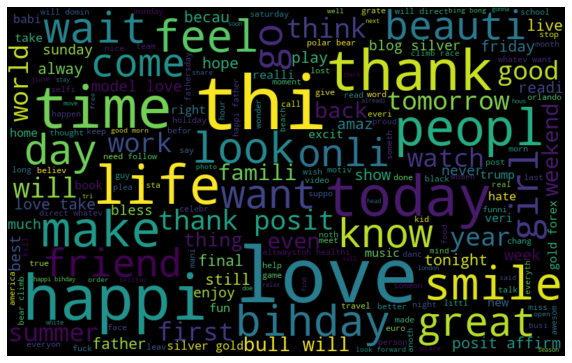

In [26]:
 from wordcloud import WordCloud
 wordcloud = WordCloud(width=800, height=500, random_state=21,
                      max_font_size=110).generate(all_words)
 plt.figure(figsize=(10,7))
 plt.imshow(wordcloud,interpolation="bilinear") 
 plt.axis('off')
 plt.show()                                                     

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn't give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

**B) Words in non racist/sexist tweets**

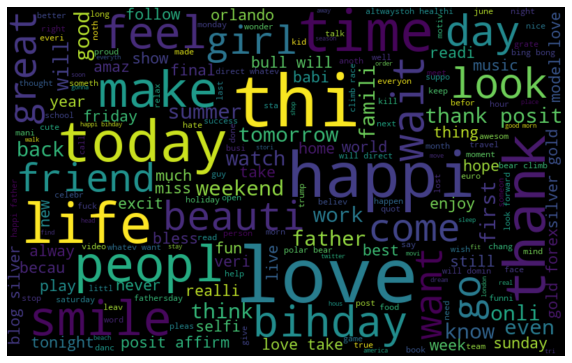

In [27]:
normal_words = ' '.join([text for text in df['tidy_tweet'] [df['label'] == 0]])

wordcloud = WordCloud (width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt .axis('off')
plt.show()


Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

**C) Racist/Sexist Tweets:**

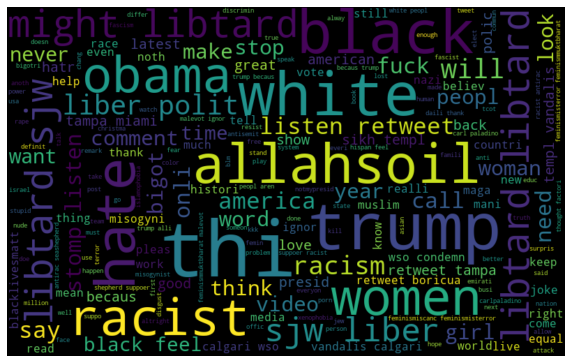

In [28]:
negative_words = ' ' .join([text for text in df['tidy_tweet'] [df['label'] == 1]]) 
wordcloud = WordCloud (width=800, height=500, random_state=21, max_font_size=110).generate ( negative_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

**D) Understanding the impact of Hashtags on tweets sentiment:**


Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

For instance, given below is a tweet from our dataset:

**"what has today's attitude to women got in common with that of norman bates? #psycho #feminism #hollaback"**

The tweet seems sexist in nature and the Hashtags in the tweet convey the same feeling.

We will store all the trend terms in two separate lists - one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [29]:
def hashtag_extract(x):
    hashtags = []   # Loop over the words in the tweet 
    for i in x:
       ht = re.findall(r"#(\w+)", i)
       hashtags.append(ht) 
    return hashtags

# extracting hashtags from noh racist/sexist tweets
HT_regular = hashtag_extract(df['tidy_tweet'][df['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative=hashtag_extract(df['tidy_tweet'][df['label'] == 1]) 
#unnesting list 
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

**Non Racist/sexist tweets:**

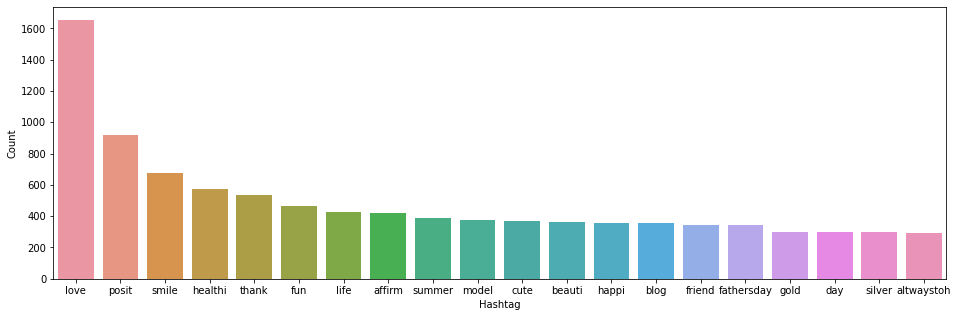

In [30]:
a = nltk.FreqDist (HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

 # selecting top 20 most frequent hashtags d

d=d.nlargest (columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x="Hashtag", y = "Count") 
ax. set(ylabel = 'Count') 
plt.show()

All the hashtags are positive and it make sense. I am expecting negative terms in the plots of the second list. Lets check the most frequent hastags appering  in the racist or sexist tweets:

**Racist/sexist tweets:**

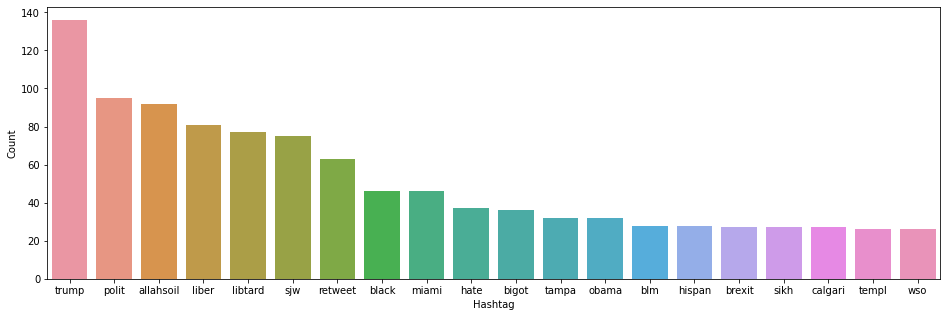

In [31]:
b=nltk.FreqDist(HT_negative)
e=pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})

e=e.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x="Hashtag", y = "Count") 
ax. set(ylabel = 'Count') 
plt.show()

As expected most of the terms are negative with a few neutral terms as well. So its nit a bad idea to keep these hashtags in our data as they contain useful information. 

Next we will try to extract features from the tokenized tweets.

To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings.

**1.Bag-of-Words Features**

**2.TF-IDF Features**

**3.Word2Vec Features**

**1.Bag-of-Words Features:**

Consider a Corpus C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a dictionary and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

Let us understand this using a simple example.

D1: He is a lazy boy. She is also lazy.

D2: Smith is a lazy person.

The dictionary created would be a list of unique tokens in the corpus =[‘He’,’She’,’lazy’,’boy’,’Smith’,’person’]

Here, D=2, N=6

The matrix M of size 2 X 6 will be represented as –

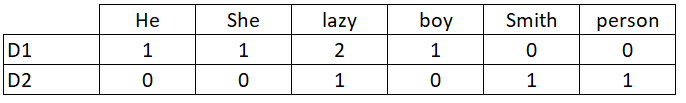

Now the columns in the above matrix can be used as features to build a classification model.



In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['tidy_tweet'])
bow.shape

(49159, 1000)

**2.TF-IDF Features**

This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalising the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

* TF = (Number of times term t appears in a document)/(Number of terms in the
document)

* IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

* TF-IDF = TF*IDF

In [36]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['tidy_tweet'])
tfidf.shape

(49159, 1000)

**3.Word2Vec Features:**

Word embeddings are the modern way of representing words as vectors. The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. They are able to achieve tasks like King -man +woman = Queen, which is mind-blowing.

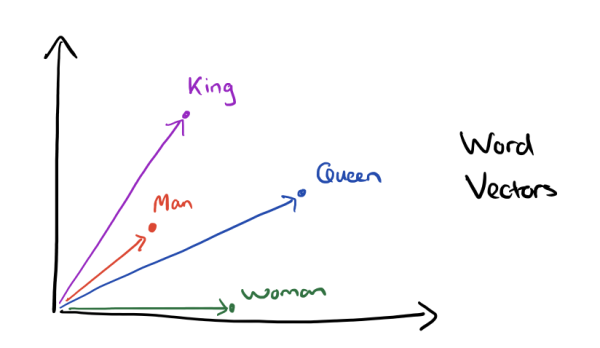

The advantages of using word embeddings over BOW or TF-IDF are:

* Dimensionality reduction - significant reduction in the no. of features required to build a model.

* It capture meanings of the words, semantic relationships and the different types of contexts they are used in.

**1. Word2Vec Embeddings**

Word2Vec is not a single algorithm but a combination of two techniques – CBOW (Continuous bag of words) and Skip-gram model. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.

CBOW tends to predict the probability of a word given a context. A context may be a single adjacent word or a group of surrounding words. The Skip-gram model works in the reverse manner, it tries to predict the context for a given word.

Below is a diagrammatic representation of a 1-word context window Word2Vec model.

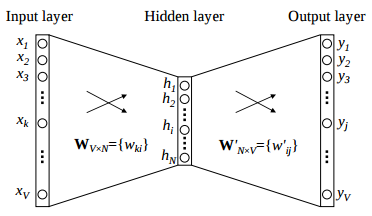

There are three laters: - an input layer, - a hidden layer, and - an output layer.

The input layer and the output, both are one- hot encoded of size [1 X V], where V is the size of the vocabulary (no. of unique words in the corpus). The output layer is a softmax layer which is used to sum the probabilities obtained in the output layer to 1. The weights learned by the model are then used as the word-vectors.

We will go ahead with the Skip-gram model as it has the following advantages:

* It can capture two semantics for a single word. i.e it will have two vector representations of ‘apple’. One for the company Apple and the other for the fruit.

* Skip-gram with negative sub-sampling outperforms CBOW generally.

We will train a Word2Vec model on our data to obtain vector representations for all the unique words present in our corpus. There is one more option of using pre-trained word vectors instead of training our own model. Some of the freely available pre-trained vectors are:

1. Google News Word Vectors

2. Freebase names

3. DBPedia vectors (wiki2vec)

However, for now, we will train our own word vectors since size of the pre-trained word vectors is generally huge.

Let’s train a Word2Vec model on our corpus.

In [37]:
%%time

tokenized_tweet =df['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(df['tidy_tweet']), epochs=20)

CPU times: user 1min 42s, sys: 400 ms, total: 1min 42s
Wall time: 55.9 s


(6509878, 7536020)

Let’s play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus.



In [38]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.560560405254364),
 ('cookout', 0.5467963218688965),
 ('#biall', 0.5465365052223206),
 ('#cellar', 0.5399865508079529),
 ('#avocado', 0.539425253868103),
 ('kayak', 0.5323796272277832),
 ('#foodcoma', 0.5267952680587769),
 ('lukey', 0.5227656364440918),
 ('dess', 0.5227009654045105),
 ('enrout', 0.5218837261199951)]

In [39]:
model_w2v.most_similar(positive="trump")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('donald', 0.5612252354621887),
 ('phoni', 0.5461306571960449),
 ('#delegaterevolt', 0.5427495241165161),
 ('potu', 0.5387749671936035),
 ('unstabl', 0.537735104560852),
 ('hillari', 0.5375962257385254),
 ('businessman', 0.5312309265136719),
 ('melo', 0.5234334468841553),
 ('unfavor', 0.5207209587097168),
 ('nomine', 0.5184663534164429)]

From the above two examples, we can see that our word2vec model does a good job of finding the most similar words for a given word. But how is it able to do so? That’s because it has learned vectors for every unique word in our data and it uses cosine similarity to find out the most similar vectors (words).

Let’s check the vector representation of any word from our corpus.

In [40]:
model_w2v['food']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 3.58670771e-01, -1.28889438e-02,  2.02333659e-01, -5.98503470e-01,
        1.17498711e-02, -1.57904759e-01, -3.31209570e-01,  4.63272035e-02,
        4.79269356e-01,  1.18327305e-01,  3.57335210e-01,  1.63502201e-01,
       -2.20280766e-01, -6.49825633e-01,  4.31218684e-01,  5.92765165e-03,
       -1.17887221e-02,  3.14782947e-01,  6.90703094e-01,  7.76116224e-03,
        2.34801397e-01, -5.69781780e-01,  3.43891494e-02, -7.25430906e-01,
       -1.00826159e-01,  2.89849758e-01, -7.22506464e-01,  4.98815179e-01,
        1.17815197e+00,  8.59460413e-01, -6.26586020e-01, -1.97694093e-01,
        2.17157573e-01,  2.03989521e-02,  2.10627109e-01, -2.75400370e-01,
       -7.46475905e-02,  1.61088139e-01,  6.19691551e-01, -4.84728843e-01,
       -4.58154082e-01, -4.33926046e-01,  5.18006623e-01,  2.81190783e-01,
        1.26343384e-01, -3.43994439e-01, -2.86743402e-01,  3.33336234e-01,
        5.39129436e-01, -5.55512011e-01,  1.89771000e-02, -2.96512574e-01,
       -6.55888095e-02,  

In [41]:
len(model_w2v['food']) #The length of the vector is 200

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


200

**Preparing Vectors for Tweets**

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [42]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

Preparing word2vec feature set…

In [43]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(49159, 200)

Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

**2. Doc2Vec Embedding**5

Doc2Vec model is an unsupervised algorithm to generate vectors for sentence/paragraphs/documents. This approach is an extension of the word2vec. The major difference between the two is that doc2vec provides an additional context which is unique for every document in the corpus. This additional context is nothing but another feature vector for the whole document. This document vector is trained along with the word vectors.


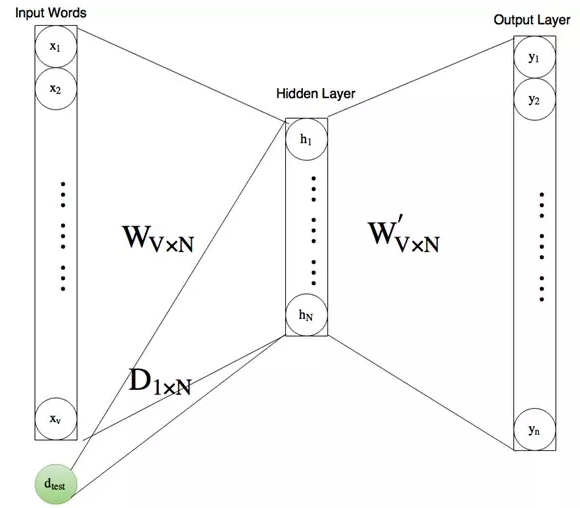

Let’s load the required libraries.

In [44]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. We can do so by using Gensim’s LabeledSentence() function.

In [45]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet) # label all the tweets

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


Let’s have a look at the result.

In [46]:
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

Now let’s train a doc2vec model.

In [47]:
%%time 
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1, # dm_mean = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 5.                                  
                                  workers=32, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23, # for reproducibility
                                 ) 

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples= len(df['tidy_tweet']), epochs=15)

100%|██████████| 49159/49159 [00:00<00:00, 2112341.75it/s]


CPU times: user 1min 33s, sys: 30.9 s, total: 2min 4s
Wall time: 1min 31s


Preparing doc2vec Feature Set:

In [48]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(df)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 200)

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

* Logistic Regression
* Support Vector Machine
* RandomForest
* XGBoost

**Evaluation Metric**

F1 score is being used as the evaluation metric. It is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is suitable for uneven class distribution problems.

The important components of F1 score are:

1. True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.

2. True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.

3. False Positives (FP) – When actual class is no and predicted class is yes.

4. False Negatives (FN) – When actual class is yes but predicted class in no.

**Precision**= TP/TP+FP

**Recall** = TP/TP+FN

**F1 Score** = 2(Recall * Precision) / (Recall + Precision)

**Logistic Regression**

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. You can also think of logistic regression as a special case of linear regression when the outcome variable is categorical, where we are using log of odds as the dependent variable. In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function.

The following equation is used in Logistic Regression:

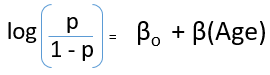

A typical logistic model plot is shown below. You can see probability never goes below 0 and above 1.

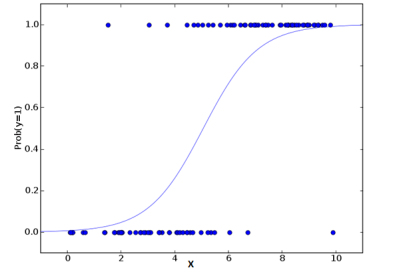

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

**Bag-of-Words Features**

We will first try to fit the logistic regression model on the Bag-of-Words (BoW) features:

In [50]:
# Extracting train and test BoW features 
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 

# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, df_train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression(solver='lbfgs') 

# training the model 
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


0.5303408146300915

Now let’s make predictions for the test dataset and create a submission file.

In [51]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
df_test['label'] = test_pred_int
submission = df_test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


**TF-IDF Features**

We’ll follow the same steps as above, but now for the TF-IDF feature set.

In [52]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:] 

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain) 

prediction = lreg.predict_proba(xvalid_tfidf)

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int) 

f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


0.5451327433628319

**Word2Vec Features**

In [53]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

lreg.fit(xtrain_w2v, ytrain) 

prediction = lreg.predict_proba(xvalid_w2v)

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


0.6139194139194138

**Doc2Vec Features**

In [54]:
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:] 

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

lreg.fit(xtrain_d2v, ytrain) 

prediction = lreg.predict_proba(xvalid_d2v)

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


0.3671668137687555

Doc2Vec features do not seem to be capturing the right signals as the F1-score on validation set is quite low

**Support Vector Machine (SVM)**

Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is the number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes as shown in the plot below:

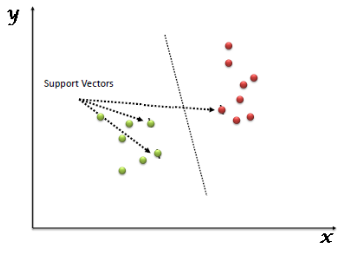

In [55]:
from sklearn import svm

**Bag-of-Words Features**

In [56]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


0.5088207985143919

Again let’s make predictions for the test dataset and create another submission file.

In [57]:
test_pred = svc.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
df_test['label'] = test_pred_int 
submission = df_test[['id','label']] 
submission.to_csv('sub_svm_bow.csv', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


Here validation score is slightly lesser than the Logistic Regression score for bag-of-words features.

**TF-IDF Features**

In [58]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


0.5104831358249772

**Word2Vec Features**

In [59]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


0.6101694915254238

**Doc2Vec Features**

In [60]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain) 
prediction = svc.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


0.2238805970149254

#RandomForest

Random Forest is a versatile machine learning algorithm capable of performing both regression and classification tasks. It is a kind of ensemble learning method, where a few weak models combine to form a powerful model. In Random Forest, we grow multiple trees as opposed to a decision single tree. To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest).

It works in the following manner. Each tree is planted & grown as follows:

1. Assume number of cases in the training set is N. Then, sample of these N cases is taken at random but with replacement. This sample will be the training set for growing the tree.

2. If there are M input variables, a number m (m<M) is specified such that at each node, m variables are selected at random out of the M. The best split on these m variables is used to split the node. The value of m is held constant while we grow the forest.

3. Each tree is grown to the largest extent possible and there is no pruning.

4. Predict new data by aggregating the predictions of the ntree trees (i.e., majority votes for classification, average for regression).

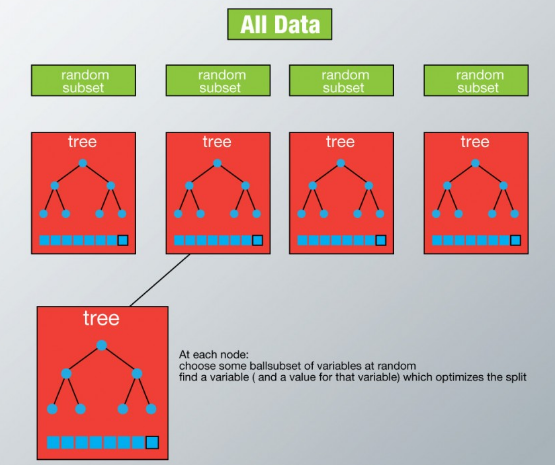



In [61]:
from sklearn.ensemble import RandomForestClassifier

**Bag-of-Words Features**

In [62]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
f1_score(yvalid, prediction) # validation score

0.5529225908372828

Let’s make predictions for the test dataset and create another submission file.

In [63]:
test_pred = rf.predict(test_bow)
df_test['label'] = test_pred
submission = df_test[['id','label']]
submission.to_csv('sub_rf_bow.csv', index=False)

**TF-IDF Features**

In [64]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 
prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.562152133580705

**Word2Vec Features**

In [65]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.4999999999999999

**Doc2Vec Features**

In [66]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain) 
prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.0704225352112676

#XGBoost

Extreme Gradient Boosting (xgboost) is an advanced implementation of gradient boosting algorithm. It has both linear model solver and tree learning algorithms. Its ability to do parallel computation on a single machine makes it extremely fast. It also has additional features for doing cross validation and finding important variables. There are many parameters which need to be controlled to optimize the model.

Some key benefits of XGBoost are:

1. Regularization - helps in reducing overfitting

2. Parallel Processing - XGBoost implements parallel processing and is blazingly faster as compared to GBM.

3. Handling Missing Values - It has an in-built routine to handle missing values.

4. Built-in Cross-Validation - allows user to run a cross-validation at each iteration of the boosting process

In [67]:
from xgboost import XGBClassifier

**Bag-of-Words Features**

In [68]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5130687318489837

In [70]:
test_pred = xgb_model.predict(test_bow)
df_test['label'] = test_pred
submission = df_test[['id','label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

**TF-IDF Features**

In [71]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5185891325071497

**Word2Vec Features**

In [72]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.646041856232939

XGBoost model on word2vec features has outperformed all the previuos models

**Doc2Vec Features**

In [73]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain) 
prediction = xgb.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.32798165137614677

**FineTuning XGBoost + Word2Vec**

XGBoost with Word2Vec model has given us the best performance so far. Let’s try to tune it further to extract as much from it as we can. XGBoost has quite a many tuning parameters and sometimes it becomes tricky to properly tune them. This is what we are going to do in the following steps. You can refer this guide to learn more about parameter tuning in XGBoost.

In [75]:
import xgboost as xgb

Here we will use DMatrices. A DMatrix can contain both the features and the target.

In [76]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)
# Parameters that we are going to tune 
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

We will prepare a custom evaluation metric to calculate F1 score.

In [77]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

**General Approach for Parameter Tuning**

We will follow the steps below to tune the parameters.

1. Choose a relatively high learning rate. Usually a learning rate of 0.3 is used at this stage.

2. Tune tree-specific parameters such as max_depth, min_child_weight, subsample, colsample_bytree keeping the learning rate fixed.

3. Tune the learning rate.

4. Finally tune gamma to avoid overfitting.

Tuning max_depth and min_child_weight

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
    for min_child_weight in range(5,8)
    ]

max_f1 = 0. # initializing with 0 

best_params = None 

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(max_depth,min_child_weight))
    
     # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

     # Cross-validation
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
        )     
    
# Finding best F1 Score    
mean_f1 = cv_results['test-f1_score-mean'].max()
boost_rounds = cv_results['test-f1_score-mean'].idxmax()    
print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    

if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))